## KMean Clustering

### KMeans 클러스터링에 대한 간략 정리
> 핸즈온 머신러닝 클러스터링을 보고 정리했습니다.

KMeans의 원리
- 데이터가 n차원에 흩어져 있다고 생각했을 때 서로 밀접한 데이터끼리 모아서 하나의 군집으로 정의하는 것을 말한다.  
- 군집의 중심이 될 데이터를 centroid라고 부르며 각 데이터는 가장 가까운 centroid로 군집되므로 centroid의 총 개수가 곧 군집의 수가 된다.  
- centroid들을 중심으로 군집이 형성되었다면 각 군집 내 평균 위치가 new centroid가 되도록 centroid 업데이트를 한다.  
- centroid가 업데이트 되면 다시 군집한다. (centroid 위치가 변경되었으니 각 데이터 마다 가장 근접한 centroid가 변경되었을 것이다.)
- 군집이 어떻게 형성될지는 데이터의 분포에 달렸으며 경험론적으로 구체에 가까운 모형이 형성될수록 군집이 잘 된다고 알려져 있으며 이를 위한 데이터 스케일링이 도움이 될 수 있다고 한다.

centroid 초기화
- centroid는 초기선정(init)이 필요한데 초기에 어떤 값이 centroid가 되느냐에 따라 클러스터링 결과가 달라지기 때문이다.
- 그래서 먼저 선정된 centroid에서 멀리 떨어진 샘플이 높은 확률로 다음 centroid가 되도록 확률 뽑기를 적용한다. 
- 이마저도 믿을 수 없으므로 초기화 및 최적화 작업 자체를 10번 진행하고, 각 centroid와 해당 데이터 간 거리의 총합이 가장 낮은 결과를 최종 모델로 선정한다.

최적의 클러스터 개수 찾기
- k값은 하이퍼파라미터 값이지만 최적의 k값을 추정할 수는 있다.
- k값을 1씩 늘려가면서 inertia의 전후 변화폭을 살펴본다. 더이상 변화폭이 크지 않아질 시점을 최적값으로 본다.
- `실루엣 계수`의 평균값을 적용하면 각 데이터가 속한 클러스터의 centroid와 가까운 편이면서 다른 클러스터와의 거리가 먼 정도를 확인할 수 있다.  
- 이를 통해 데이터가 애매한 선상에서 군집에 속했는지, 아니면 군집이 명확하게 데이터를 잘 분리하고 있는지에 대한 정도를 파악할 수 있다.

Kmeans의 한계
- 데이터가 원형이 아니거나 밀집의 정도가 feature별로 크게 다르다면 클러스터링이 잘 안될 가능성이 높다.

---

### KMeans Clustering 구현을 통한 이해
임의의 2차원 원형데이터를 가져와서 클러스터링을 구현해보자

#### 군집된 데이터의 평균값을 찾아 해당 지점을 센트로이드로 지정하는 방식은 아래와 같다.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
data, _ = make_blobs(n_samples=500, n_features=2, centers=1)

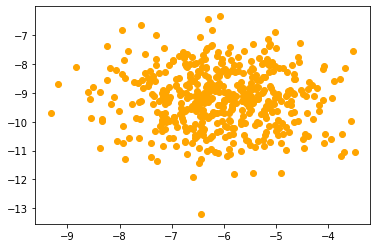

In [2]:
# 시각화
x, y = data[:, 0], data[:, 1]
plt.scatter(x, y, color='orange')

위와 같은 군집이 하나 있다고 했을 때 아래와 같이 간단하게 구할 수 있다.

In [3]:
# x, y축의 평균값 구하기
avg_data = data.mean(axis=0)

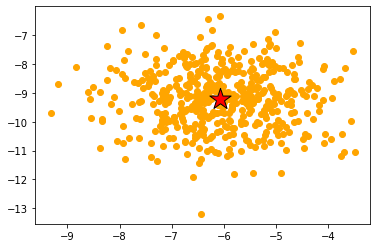

In [4]:
# Centroid 표기
plt.scatter(x, y, color='orange')
plt.scatter(avg_data[0], avg_data[1], color='red', marker='*', edgecolors='black', s=5e2) 

plt.show()

---

#### 센트로이드 initialize

아서, 세르게이 바실비츠키의 2006년 논문에 따르면 센트로이드 초기 선정이 군집에 중요한 역할을 한다고 한다.
초기화 방법으로 k개의 센트로이드 선정 시 각 센트로이드는 서로 멀리 떨어지도록 확률적으로 선정하는 방법을 주장한다.

In [191]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
data, _ = make_blobs(n_samples=5000, n_features=2, centers=4)

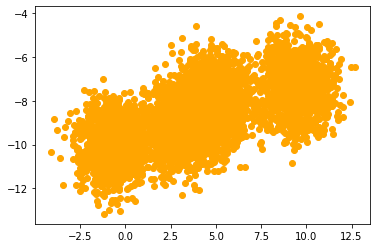

In [192]:
# 시각화
x, y = data[:, 0], data[:, 1]
plt.scatter(x, y, color='orange')

In [193]:
import random

# 첫 센트로이드는 데이터 중 하나로 랜덤선정, 앞으로도 더 뽑아야 하니 리스트에 보관한다.
centroids = [random.choice(data)]
centroids

[array([ 0.76487555, -9.53230856])]

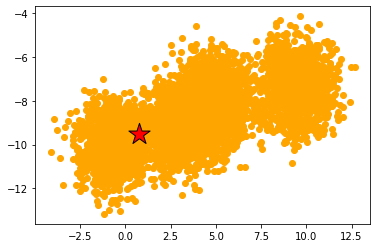

In [194]:
# 첫 센트로이드의 위치 표기
plt.scatter(x, y, color='orange')

for cent in centroids:
    plt.scatter(cent[0], cent[1], color='r', marker='*', edgecolors='black', s=5e2) 

plt.show()

In [195]:
# 유클리디안 거리
def euclidean(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

HOW?  
1. 이미 선정된 센트로이드와 각 데이터 간 거리를 구한다.  
2. 각 데이터의 거리 / 모든 거리 데이터의 합을 적용한다.

> 이렇게해서 각 데이터는 확률값을 갖게되는데 거리가 가까울수록(값이 작을수록) 낮은 확률이 된다.  
그러므로 선정된 센트로이드와 거리가 가장 먼 데이터가 다음 센트로이드로 선정될 확률이 가장 높게 된다.


In [196]:
# k개의 센트로이드를 선정한다. (첫 센트로이드는 이미 뽑았으니 k-1만큼 추가 선정한다.)
k = 4
row = data.shape[0] # 데이터 수
for _ in range(k-1):
    distance = np.empty(0)
    for values in data:

        # 자신과 가장 가까운 센트로이드를 선정
        nearest_cent_idx = np.argmin([euclidean(values, centroid) for centroid in centroids])
        target_cent = centroids[nearest_cent_idx]

        # 선정된 센트로이드와의 거리 계산
        distance = np.append(distance, [euclidean(target_cent, values)])

    # 각 데이터에 대한 확률을 구함
    prob = distance / distance.sum()

    # 데이터의 인덱스번호를 확률에 따른 추출 및 다음 센트로이드 선정
    next_cent_idx = np.random.choice(range(row), p=prob)
    centroids.append(data[next_cent_idx])

centroids

[array([ 0.76487555, -9.53230856]),
 array([ 3.94651733, -6.42296797]),
 array([ 9.62731812, -6.90502201]),
 array([ 8.07731475, -7.27058655])]

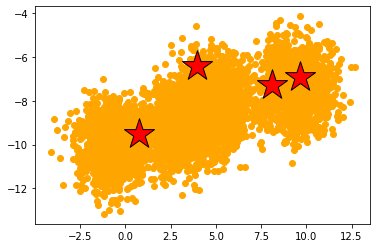

In [197]:
# 초기 선정 완료된 센트로이드 표기
plt.scatter(x, y, color='orange')

for cent in centroids:
    plt.scatter(cent[0], cent[1], color='r', marker='*', edgecolors='black', s=1e3) 

plt.show()

#### 선정된 센트로이드들을 기준으로 군집합니다.

In [198]:
# 군집결과를 담을 바구니를 준비합니다.
cluster = [np.empty(0)] * k
dim = data.shape[-1] # 차원 수
for values in data:
    # 자신과 가장 가까운 센트로이드를 선정
    compare_distance = [euclidean(values, centroid) for centroid in centroids]
    nearest_cent_idx = np.argmin(compare_distance)

    # 센트로이드 기준으로 데이터를 군집
    cluster[nearest_cent_idx] = np.concatenate((cluster[nearest_cent_idx], values))

# 1차원으로 군집한 결과를 (n, dim)차원으로 변경    
cluster = [values.reshape(-1, dim) for values in cluster]

cluster

[array([[-1.31242652e-01, -9.72814710e+00],
        [ 4.03206422e+00, -1.04419230e+01],
        [ 1.43268829e+00, -1.05603444e+01],
        ...,
        [ 8.66884784e-03, -8.62785622e+00],
        [ 3.27761458e-01, -9.85796050e+00],
        [ 2.37864370e+00, -1.07313225e+01]]),
 array([[ 4.7673007 , -8.64119225],
        [ 3.62613408, -9.19955963],
        [ 5.38257255, -8.50995737],
        ...,
        [ 3.56141162, -8.55616746],
        [ 4.91201539, -7.72384826],
        [ 5.67463027, -7.71700809]]),
 array([[ 9.7499268 , -9.01805174],
        [ 9.09029503, -6.78607765],
        [ 9.07643676, -7.80182703],
        ...,
        [10.98445884, -8.72150801],
        [10.0151978 , -6.87232222],
        [ 9.24781846, -7.78848081]]),
 array([[  9.09685535,  -8.17914698],
        [  8.37427252,  -7.29708926],
        [  9.07544639,  -9.22895692],
        ...,
        [  5.98146049,  -7.7624813 ],
        [  5.68508607,  -9.33078808],
        [  5.37650184, -11.11950761]])]

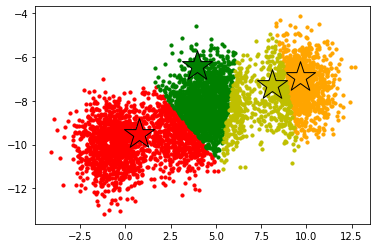

In [199]:
# 군집 결과 확인
colors = ['r', 'g', 'orange', 'y']

for num in range(k): # 그룹 번호 출력
    plt.scatter(cluster[num][:, 0], cluster[num][:, 1], color=colors[num], s=10)
    plt.scatter(centroids[num][0], centroids[num][1], color=colors[num], marker='*', edgecolors='black', s=1e3)

plt.show()

#### 센트로이드를 업데이트 합니다.

위에서 언급한 바와 같이 각 클러스터별 내 데이터의 평균 거리를 구하여 해당 결과가 다음 센트로이드가 됩니다.

In [200]:
# 센트로이드 업데이트
for num in range(k):
    centroids[num] = cluster[num].mean(axis=0)

centroids

[array([ 0.57698109, -9.86469474]),
 array([ 4.35823838, -8.08088631]),
 array([ 9.9234822 , -7.22709786]),
 array([ 7.42298933, -7.99834927])]

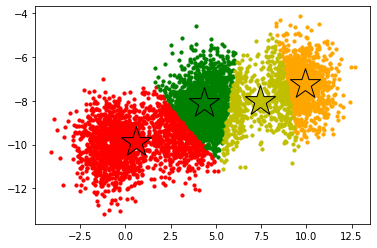

In [201]:
# 센트로이드 업데이트 결과 확인
colors = ['r', 'g', 'orange', 'y']

for num in range(k): # 그룹 번호 출력
    plt.scatter(cluster[num][:, 0], cluster[num][:, 1], color=colors[num], s=10)
    plt.scatter(centroids[num][0], centroids[num][1], color=colors[num], marker='*', edgecolors='black', s=1000)

plt.show()

센트로이드가 이동한 것을 확인할 수 있습니다.

#### 센트로이드 업데이트를 더이상 변화가 없을때 까지 진행합니다.

update_1: inertia(6572.498712741373)


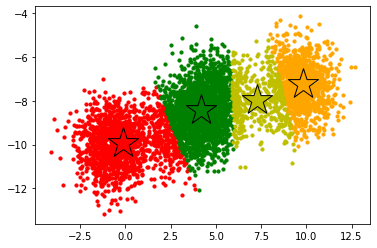

update_2: inertia(6397.2965408130585)


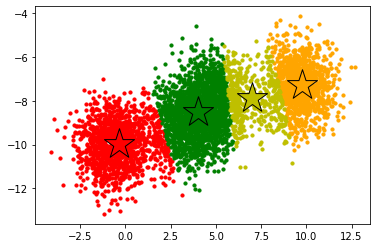

update_3: inertia(6290.7749044848315)


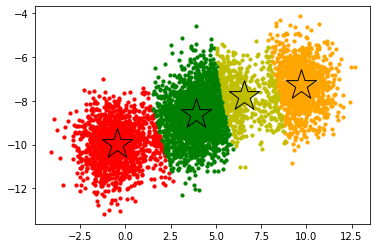

update_4: inertia(6147.037896971424)


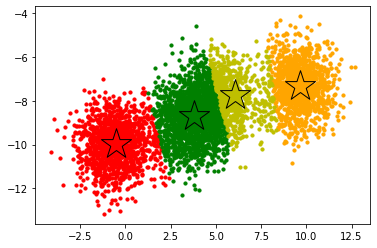

update_5: inertia(6028.452905780193)


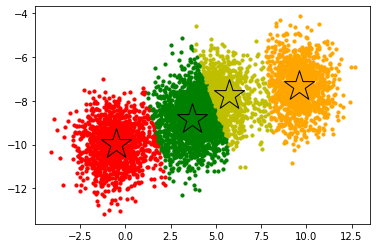

update_6: inertia(5949.574186545837)


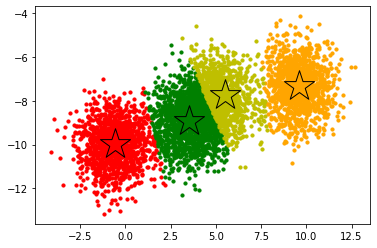

update_7: inertia(5910.830352220199)


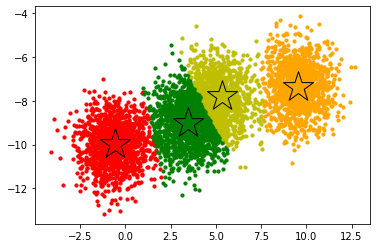

update_8: inertia(5896.928874782449)


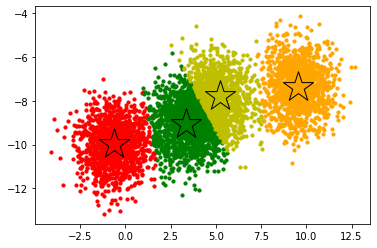

update_9: inertia(5890.18072485883)


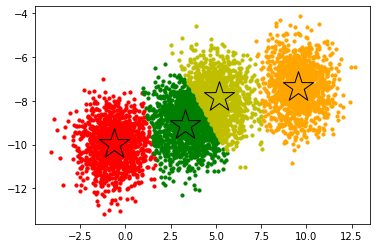

update_10: inertia(5888.076911135535)


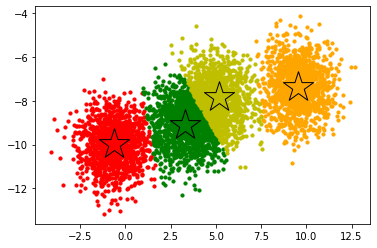

update_11: inertia(5887.267495057554)


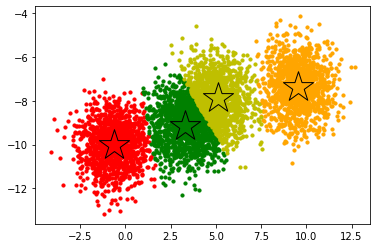

update_12: inertia(5886.712533126946)


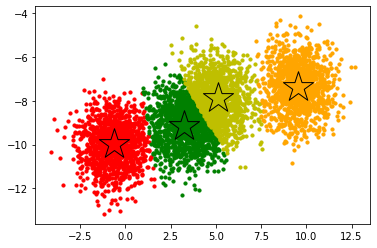

update_13: inertia(5886.025194759367)


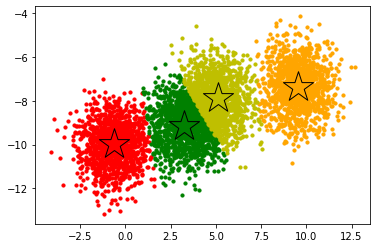

update_14: inertia(5885.692944113867)


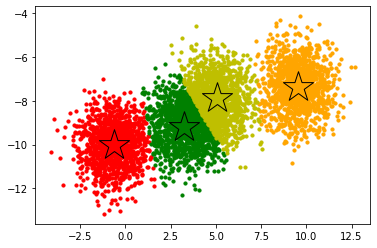

update_15: inertia(5885.824668103775)


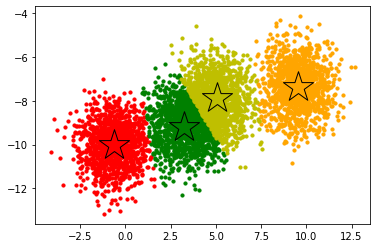

update_16: inertia(5885.823028272214)


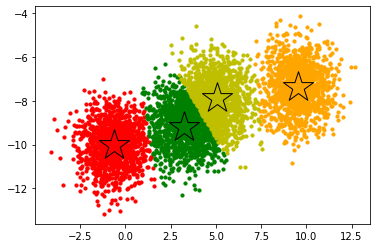

update_17: inertia(5885.820836542479)


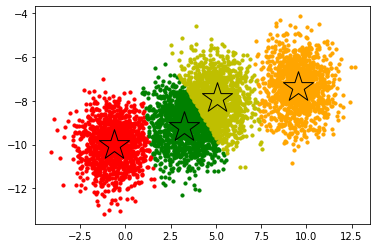

update_18: inertia(5885.801654236584)


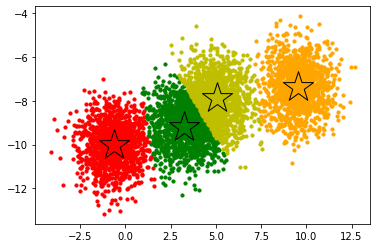

update_19: inertia(5885.801654236584)


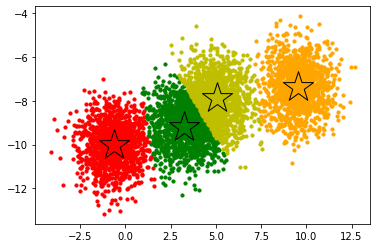

Finish: Centroid didn't move anymore


In [202]:
# 지정된 센트로이드의 변화가 없을 때까지 업데이트합니다.
update_cnt = 1
while True:
    # 센트로이드 기준으로 군집
    cluster = [np.empty(0)] * k

    for values in data:
        # 자신과 가장 가까운 센트로이드를 선정
        compare_distance = [euclidean(values, centroid) for centroid in centroids]
        nearest_cent_idx = np.argmin(compare_distance)

        # 센트로이드 기준으로 데이터를 군집
        cluster[nearest_cent_idx] = np.concatenate((cluster[nearest_cent_idx], values))

    # 1차원 군집 결과를 (n, dim)차원으로 변경    
    cluster = [values.reshape(-1, dim) for values in cluster]


    # 센트로이드 업데이트
    equal_check = 0
    for num in range(k):
        new_centroid = cluster[num].mean(axis=0)
        if (centroids[num] == new_centroid).all():
            equal_check += 1
        else:
            centroids[num] = new_centroid

        
    # 센트로이드 업데이트 결과 확인
    inertia = 0
    colors = ['r', 'g', 'orange', 'y']
    for num in range(k): # 그룹 번호 출력
        # 클러스터별 유클리디안 거리의 총합(inertia) 구하기
        inertia += np.sum(np.sqrt(np.sum((centroids[num] - cluster[num]) ** 2, axis=1)))
        # 시각화
        plt.scatter(cluster[num][:, 0], cluster[num][:, 1], color=colors[num], s=10)
        plt.scatter(centroids[num][0], centroids[num][1], color=colors[num], marker='*', edgecolors='black', s=1000)
        
    print(f'update_{update_cnt}: inertia({inertia})')
    update_cnt += 1
    plt.show()
        
    # 모든 센트로이드가 자리잡으면 inertia 계산 및 중단
    if equal_check == k:
        print(f"Finish: Centroid didn't move anymore")
        break

#### 최종 정리

위 과정을 아래 코드와 같이 정리합니다.  
추가적으로 클러스터링 작업을 총 n회 실시하며, n회 실시한 결과를 비교합니다.  
이는 센트로이드 초기화가 곧 클러스터링의 품질 결정에 큰 영향을 주기 때문입니다.

In [203]:
# 정리
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm


def kmeans_cluster(data, iteration=10, k=4):
    """KMeans 클러스터링

    Args:
        data (ndarray): 클러스터링 학습 데이터
        iteration (int): 총 클러스터링 횟수 지정
        k (int): 군집 개수 설정

    Returns:
        _type_: _description_
    """

    def euclidean(x, y):
        return np.sqrt(np.sum((x - y) ** 2))


    # KMeans 클러스터링 
    total_inertia = []
    total_centroids = []
    total_cluster = []
    row, dim = data.shape # 데이터의 개수 및 차원 수

    for _ in tqdm(range(iteration), leave=False):

        # 첫 센트로이드 선정
        centroids = [random.choice(data)]

        # k개의 센트로이드를 선정한다. (처음은 임의로 뽑았으니 k-1만큼 추가 선정한다.)
        for _ in range(k-1):
            distance = np.array([])
            for value in data:

                # 자신과 가장 가까운 센트로이드를 선정
                nearest_cent_idx = np.argmin([euclidean(value, centroid) for centroid in centroids])
                target_cent = centroids[nearest_cent_idx]

                # 선정된 센트로이드와의 거리 계산
                distance = np.append(distance, [euclidean(target_cent, value)])

            # 각 데이터에 대한 확률을 구함
            prob = distance / distance.sum()

            # 데이터의 인덱스번호를 확률에 따른 추출 및 다음 센트로이드 선정
            next_cent_idx = np.random.choice(range(row), p=prob)
            centroids.append(data[next_cent_idx])


        # 지정된 센트로이드의 변화가 없을 때까지 업데이트합니다.
        while True:
            # 센트로이드 기준으로 군집
            cluster = [np.empty(0)] * k

            for values in data:
                # 자신과 가장 가까운 센트로이드를 선정
                compare_distance = [euclidean(values, centroid) for centroid in centroids]
                nearest_cent_idx = np.argmin(compare_distance)

                # 센트로이드 기준으로 데이터를 군집
                cluster[nearest_cent_idx] = np.concatenate((cluster[nearest_cent_idx], values))

            # 1차원 군집 결과를 (n, dim)차원으로 변경    
            cluster = [values.reshape(-1, dim) for values in cluster]


            # 센트로이드 업데이트
            equal_check = 0
            for num in range(k):
                new_centroid = cluster[num].mean(axis=0)
                if (centroids[num] == new_centroid).all():
                    equal_check += 1
                else:
                    centroids[num] = new_centroid

            # 모든 센트로이드가 자리잡으면 inertia 계산 및 중단
            if equal_check == k:
                inertia = 0
                for num in range(k):
                    # 클러스터별 유클리디안 거리의 총합 구하기
                    inertia += np.sum(np.sqrt(np.sum((centroids[num] - cluster[num]) ** 2, axis=1)))
                break

        # 최종 centroids 및 inertia 정보 입수
        total_inertia.append(inertia)
        total_centroids.append(centroids)
        total_cluster.append(cluster)
    
    return total_inertia, total_centroids, total_cluster

#### 2차원 클러스터링 확인
총 5개의 클러스터링을 진행해봅니다.

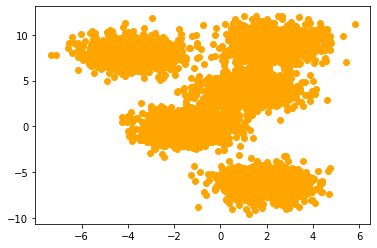

In [210]:
# 데이터 선정
data, _ = make_blobs(n_samples=5000, n_features=2, centers=5)
x, y = data[:, 0], data[:, 1]

# 시각화
plt.scatter(x, y, color='orange')
plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

inertia: 6300.625232895949


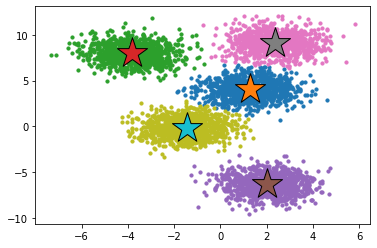

inertia: 8897.285985216251


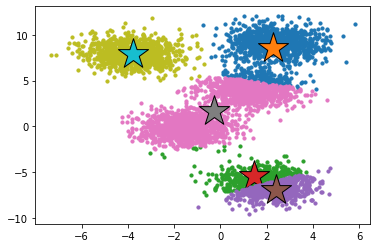

inertia: 6300.653179110499


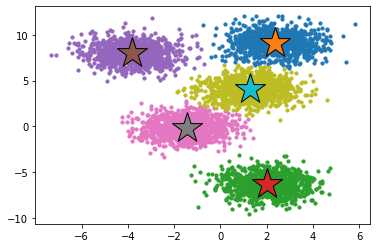

inertia: 6300.625232895949


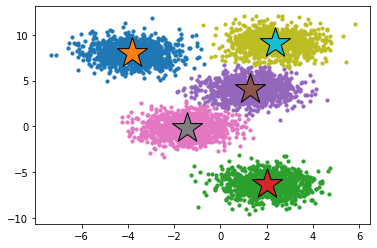

inertia: 6300.625232895949


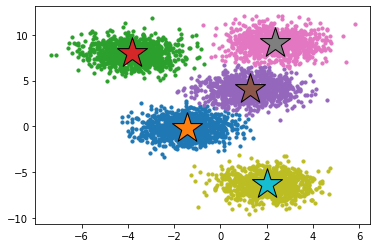

In [211]:
# 클러스터링 및 결과 확인
k = 5
iteration = 5
total_inertia, total_centroids, total_cluster = kmeans_cluster(data, iteration=iteration, k=k)

for centroids, cluster, inertia in zip(total_centroids, total_cluster, total_inertia):
    for num in range(k): # 그룹 번호 출력
        plt.scatter(cluster[num][:, 0], cluster[num][:, 1], s=10)
        plt.scatter(centroids[num][0], centroids[num][1], marker='*', edgecolors='black', s=1000)
    print(f"inertia: {inertia}")
    plt.show()

#### 3차원 클러스터링 확인

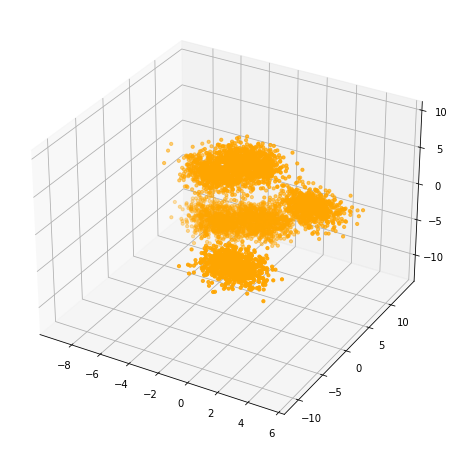

In [212]:
# 데이터 선정
data, _ = make_blobs(n_samples=5000, n_features=3, centers=6)
x, y, z = data[:, 0], data[:, 1], data[:, 2]

# 시각화
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='orange', s=10)
plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

inertia: 8001.927503448853


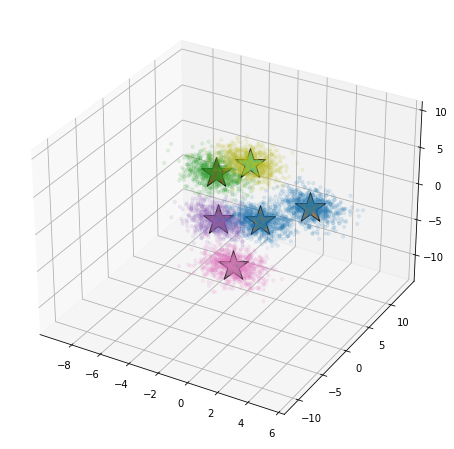

inertia: 8001.927503448853


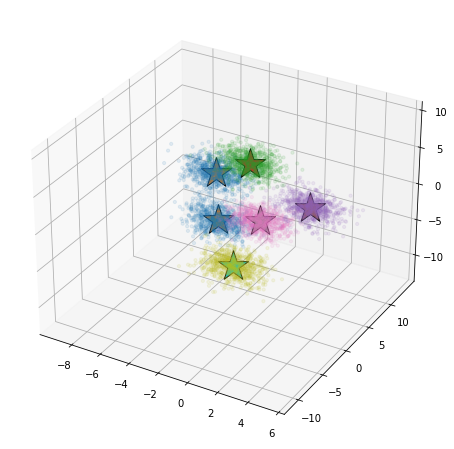

inertia: 8001.927503448853


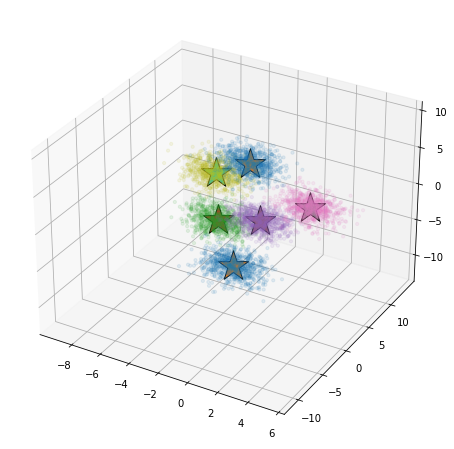

inertia: 11060.269702463476


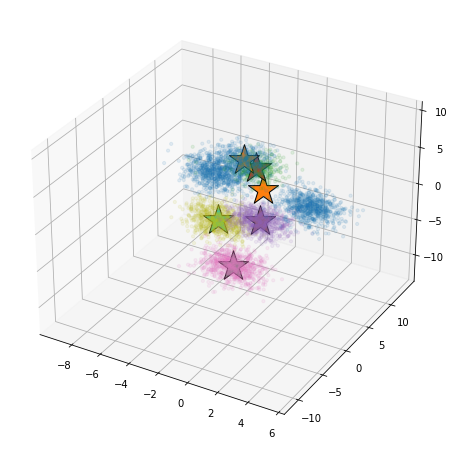

inertia: 9529.603182798945


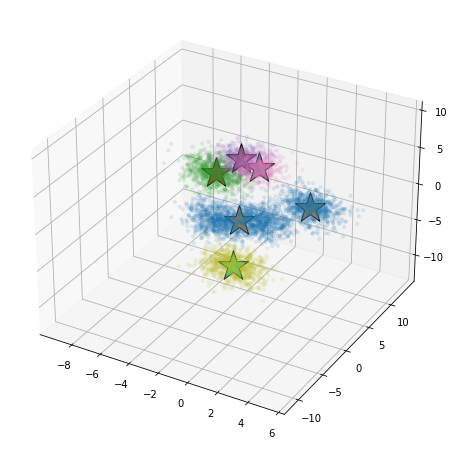

In [213]:
# 클러스터링 및 결과 확인
k = 6
iteration = 5
total_inertia, total_centroids, total_cluster = kmeans_cluster(data, iteration=iteration, k=k)

colors = ['r', 'g', 'orange', 'y']
for centroids, cluster, inertia in zip(total_centroids, total_cluster, total_inertia):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for num in range(k): # 그룹 번호 출력
        ax.scatter(cluster[num][:, 0], cluster[num][:, 1], cluster[num][:, 2], alpha=0.1, s=10)
        ax.scatter(centroids[num][0], centroids[num][1], centroids[num][2], marker='*', edgecolors='black', s=1000)
    print(f"inertia: {inertia}")
    plt.show()


## image segmentation

해당 이미지를 KMeans 클러스터링을 통해 k개의 평균 색상으로 전환한다.  
이렇게하면 색상 간 경계가 명확하지게 하는 효과가 있다.

In [40]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
image = imread('./ladybug.png')
image.shape

(533, 800, 3)

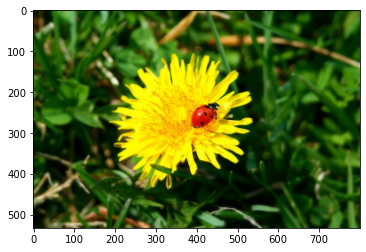

In [41]:
# 원본
plt.imshow(image)
plt.show()

In [47]:
from sklearn.cluster import KMeans
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)

# 8개의 센트로이드는 각각 하나의 색깔을 갖게된다. (클러스터 내 데이터들의 중간쯤에 위치한 값이 되므로)
# 그러므로 각 레이블을 센트로이드 컬러로 가져오면 클러스터링 완료된 이미지를 불러올 수 있게 된다.
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

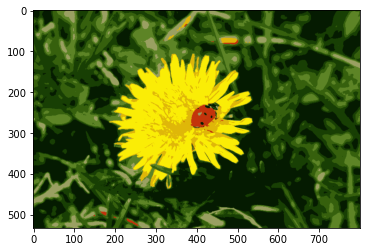

In [48]:
plt.imshow(segmented_img)

In [49]:
# 학습 데이터별 속한 클러스터 레이블
kmeans.labels_

array([4, 4, 4, ..., 1, 1, 4], dtype=int32)

In [50]:
# 센트로이드 값
kmeans.cluster_centers_

array([[0.7647823 , 0.20010777, 0.04397612],
       [0.09521493, 0.24804279, 0.01594832],
       [0.9831805 , 0.9328854 , 0.02554294],
       [0.36577335, 0.51883733, 0.15236753],
       [0.02191272, 0.10814804, 0.00565911],
       [0.87656415, 0.7178996 , 0.03665842],
       [0.6077759 , 0.6281949 , 0.38493857],
       [0.21228825, 0.37974477, 0.05475648]], dtype=float32)

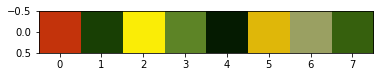

In [51]:
# 센트로이드별 색상
plt.imshow(kmeans.cluster_centers_.reshape(-1, 8, 3))